# CUSTOMER CHURN PREDICTION

### Problem statement
Develop a model to predict customer churn for a subscription based service or business. Use historical customer data, including
features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.

### Domain Analysis:
Domain analysis for bank customer churn prediction involves understanding the specific characteristics and challenges within the banking industry that can impact customer retention.
By thoroughly understanding these aspects of the banking domain, you can develop a more robust and context-aware customer churn prediction model. This knowledge can guide the selection of relevant features, the design of interventions, and the interpretation of model outputs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\pares\OneDrive\Documents\codsoft_internship\customer_churn\Churn_Modelling.csv")

### Basic Checks

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


there are no null values.


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


<Axes: xlabel='Exited', ylabel='count'>

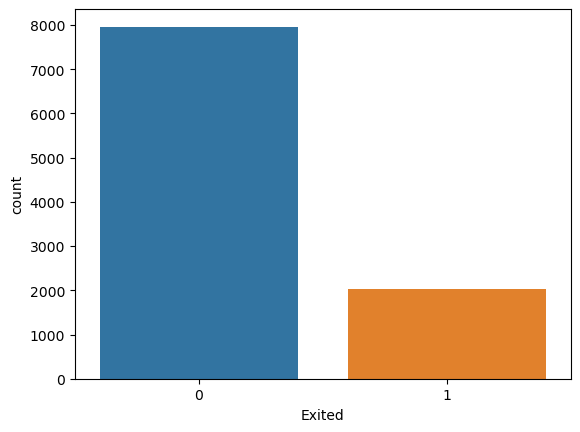

In [8]:
sns.countplot(x='Exited',data=df)

In [9]:
df['Exited'].value_counts().to_frame()

,count
Exited,
0,7963
1,2037


In [11]:
df.drop(['RowNumber','CustomerId','Surname'] , axis=1,inplace=True)

## Exploratory Data Analysis

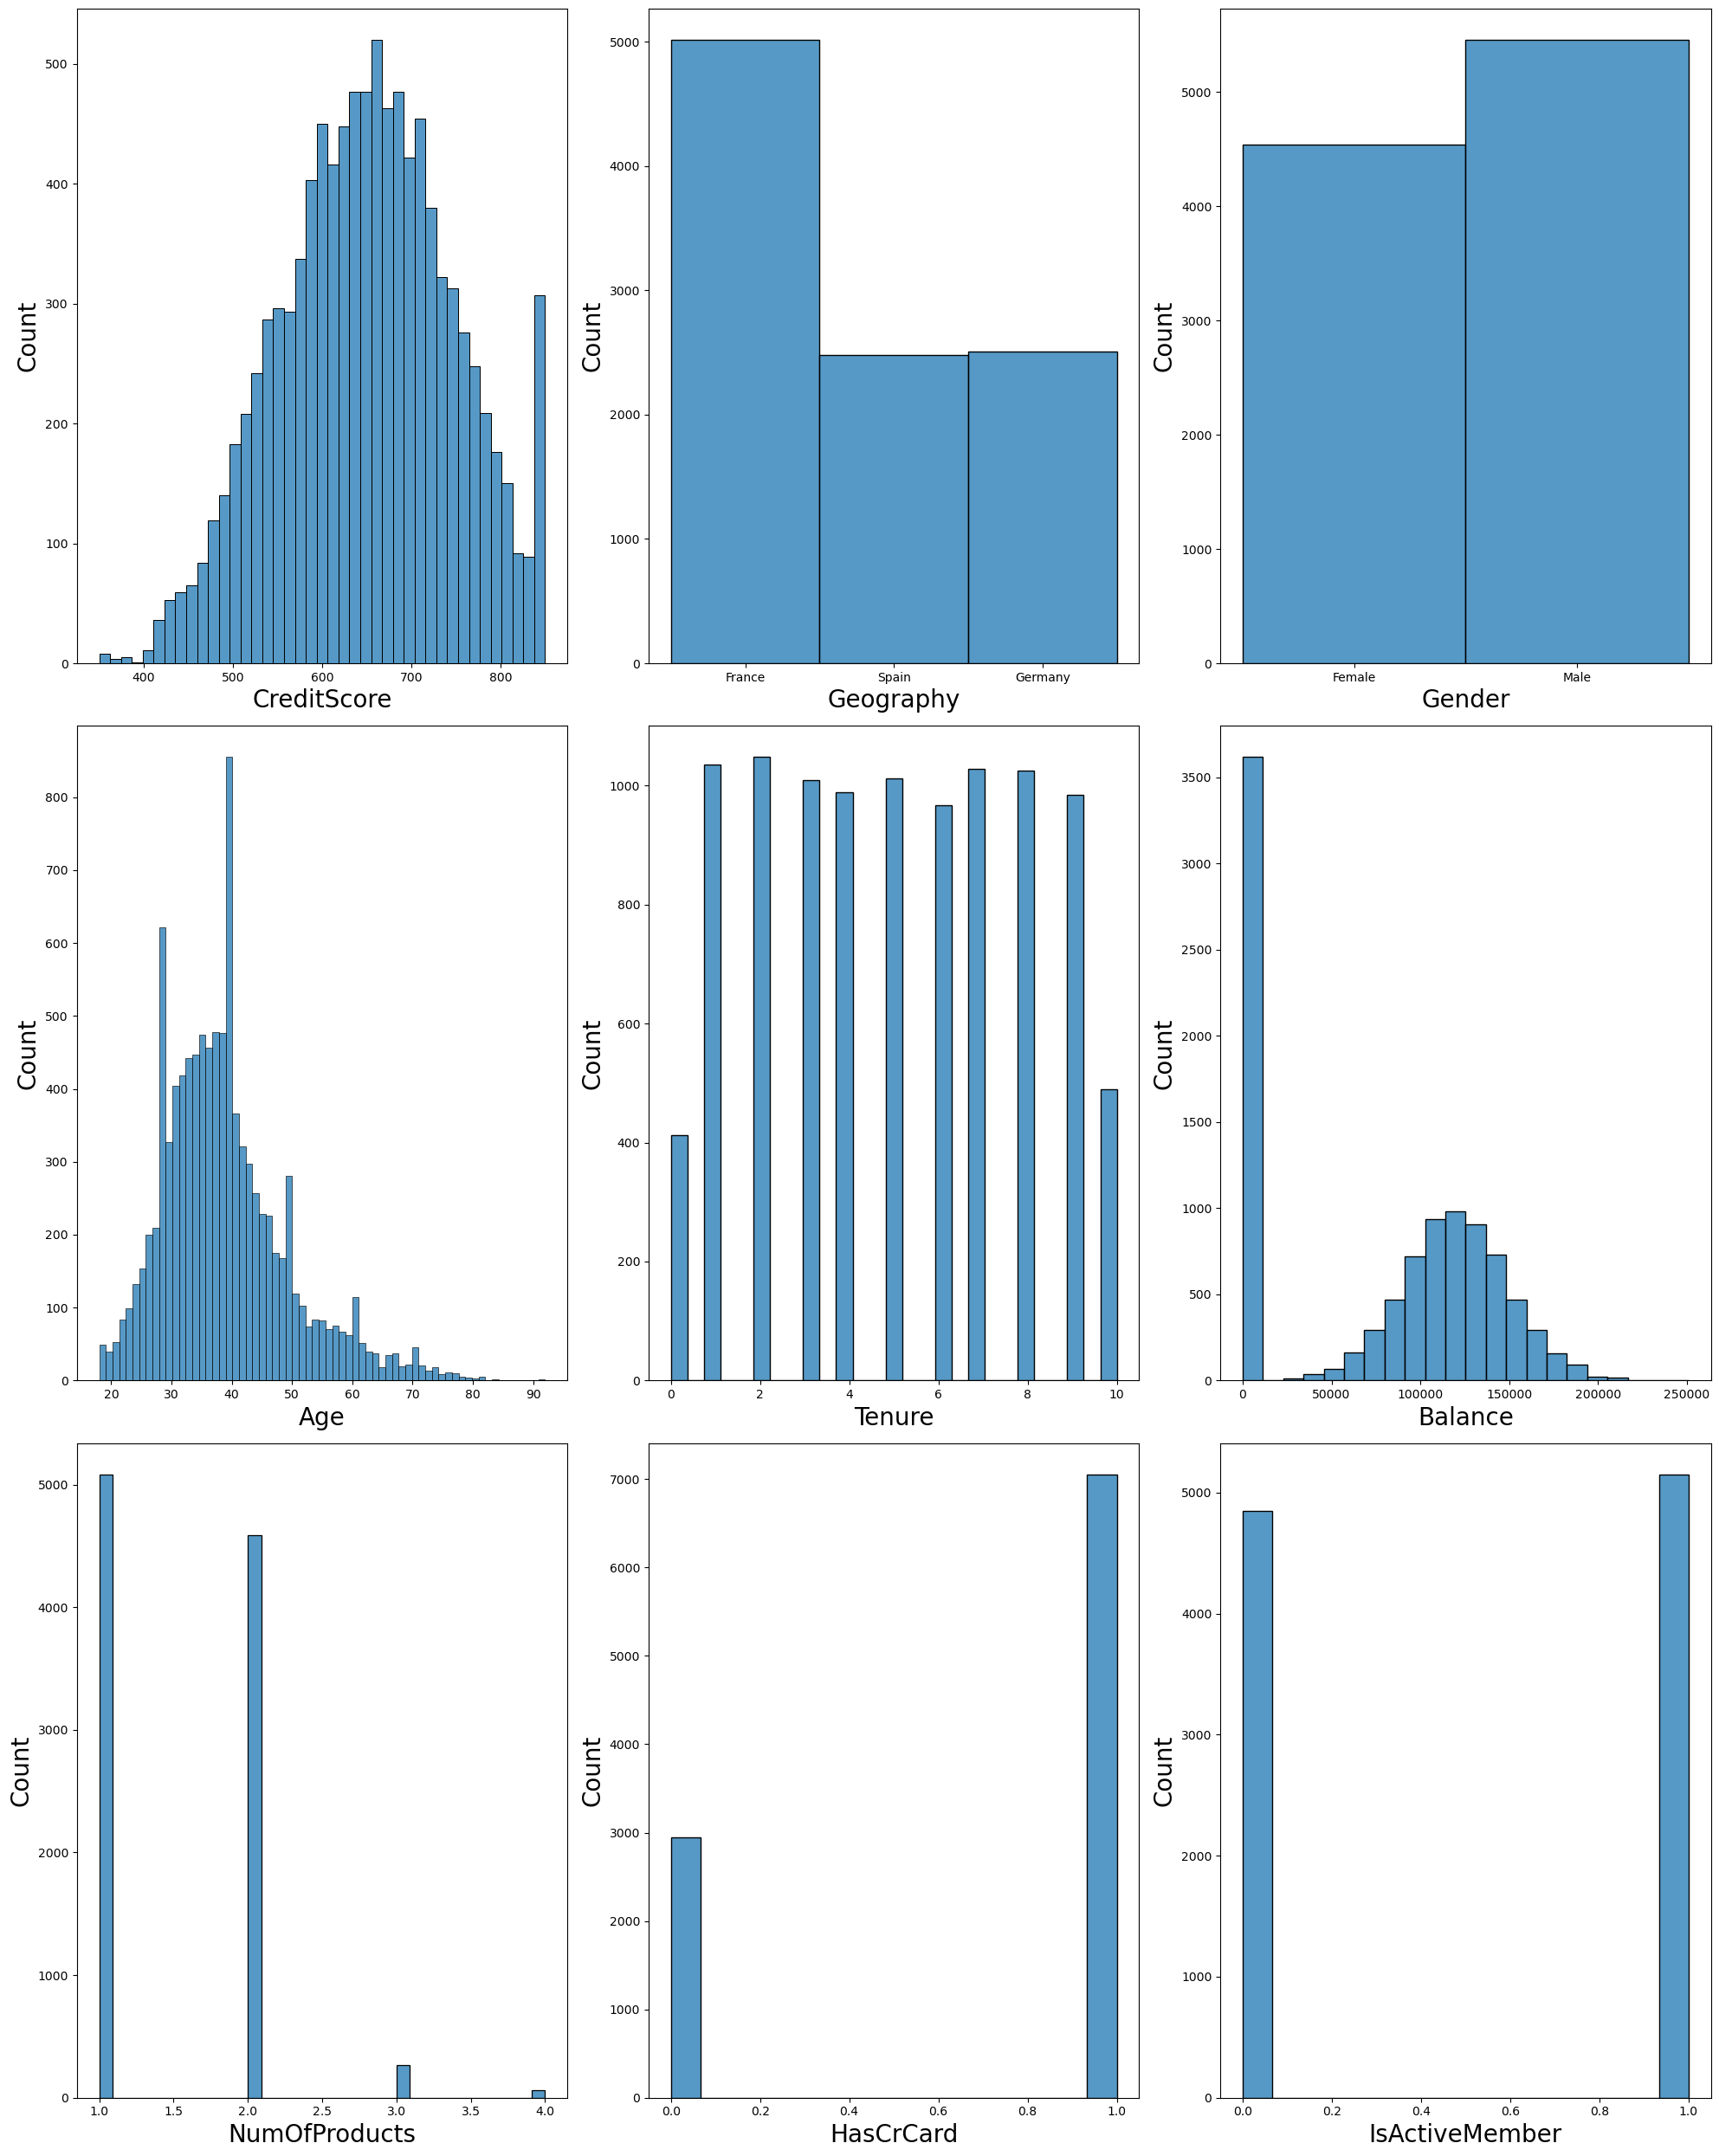

In [12]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

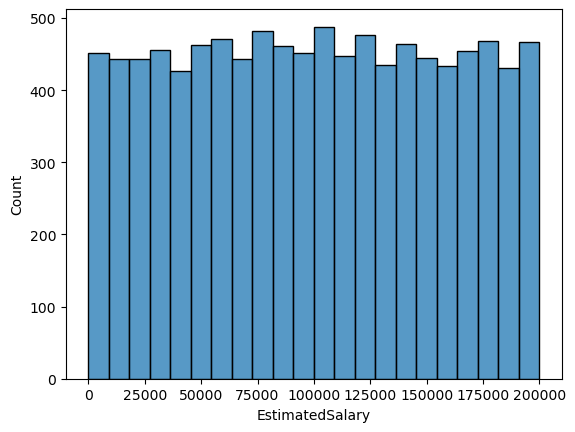

In [13]:
sns.histplot(df['EstimatedSalary'])

<Axes: xlabel='CreditScore', ylabel='Count'>

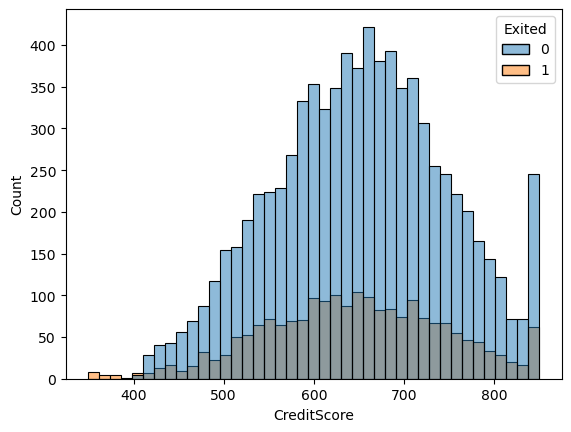

In [14]:
sns.histplot(x='CreditScore',hue='Exited',data=df)

## Data Preprocessing and Feature Engineering

In [15]:
# Handle categorical variables (Geography and Gender) using one-hot encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


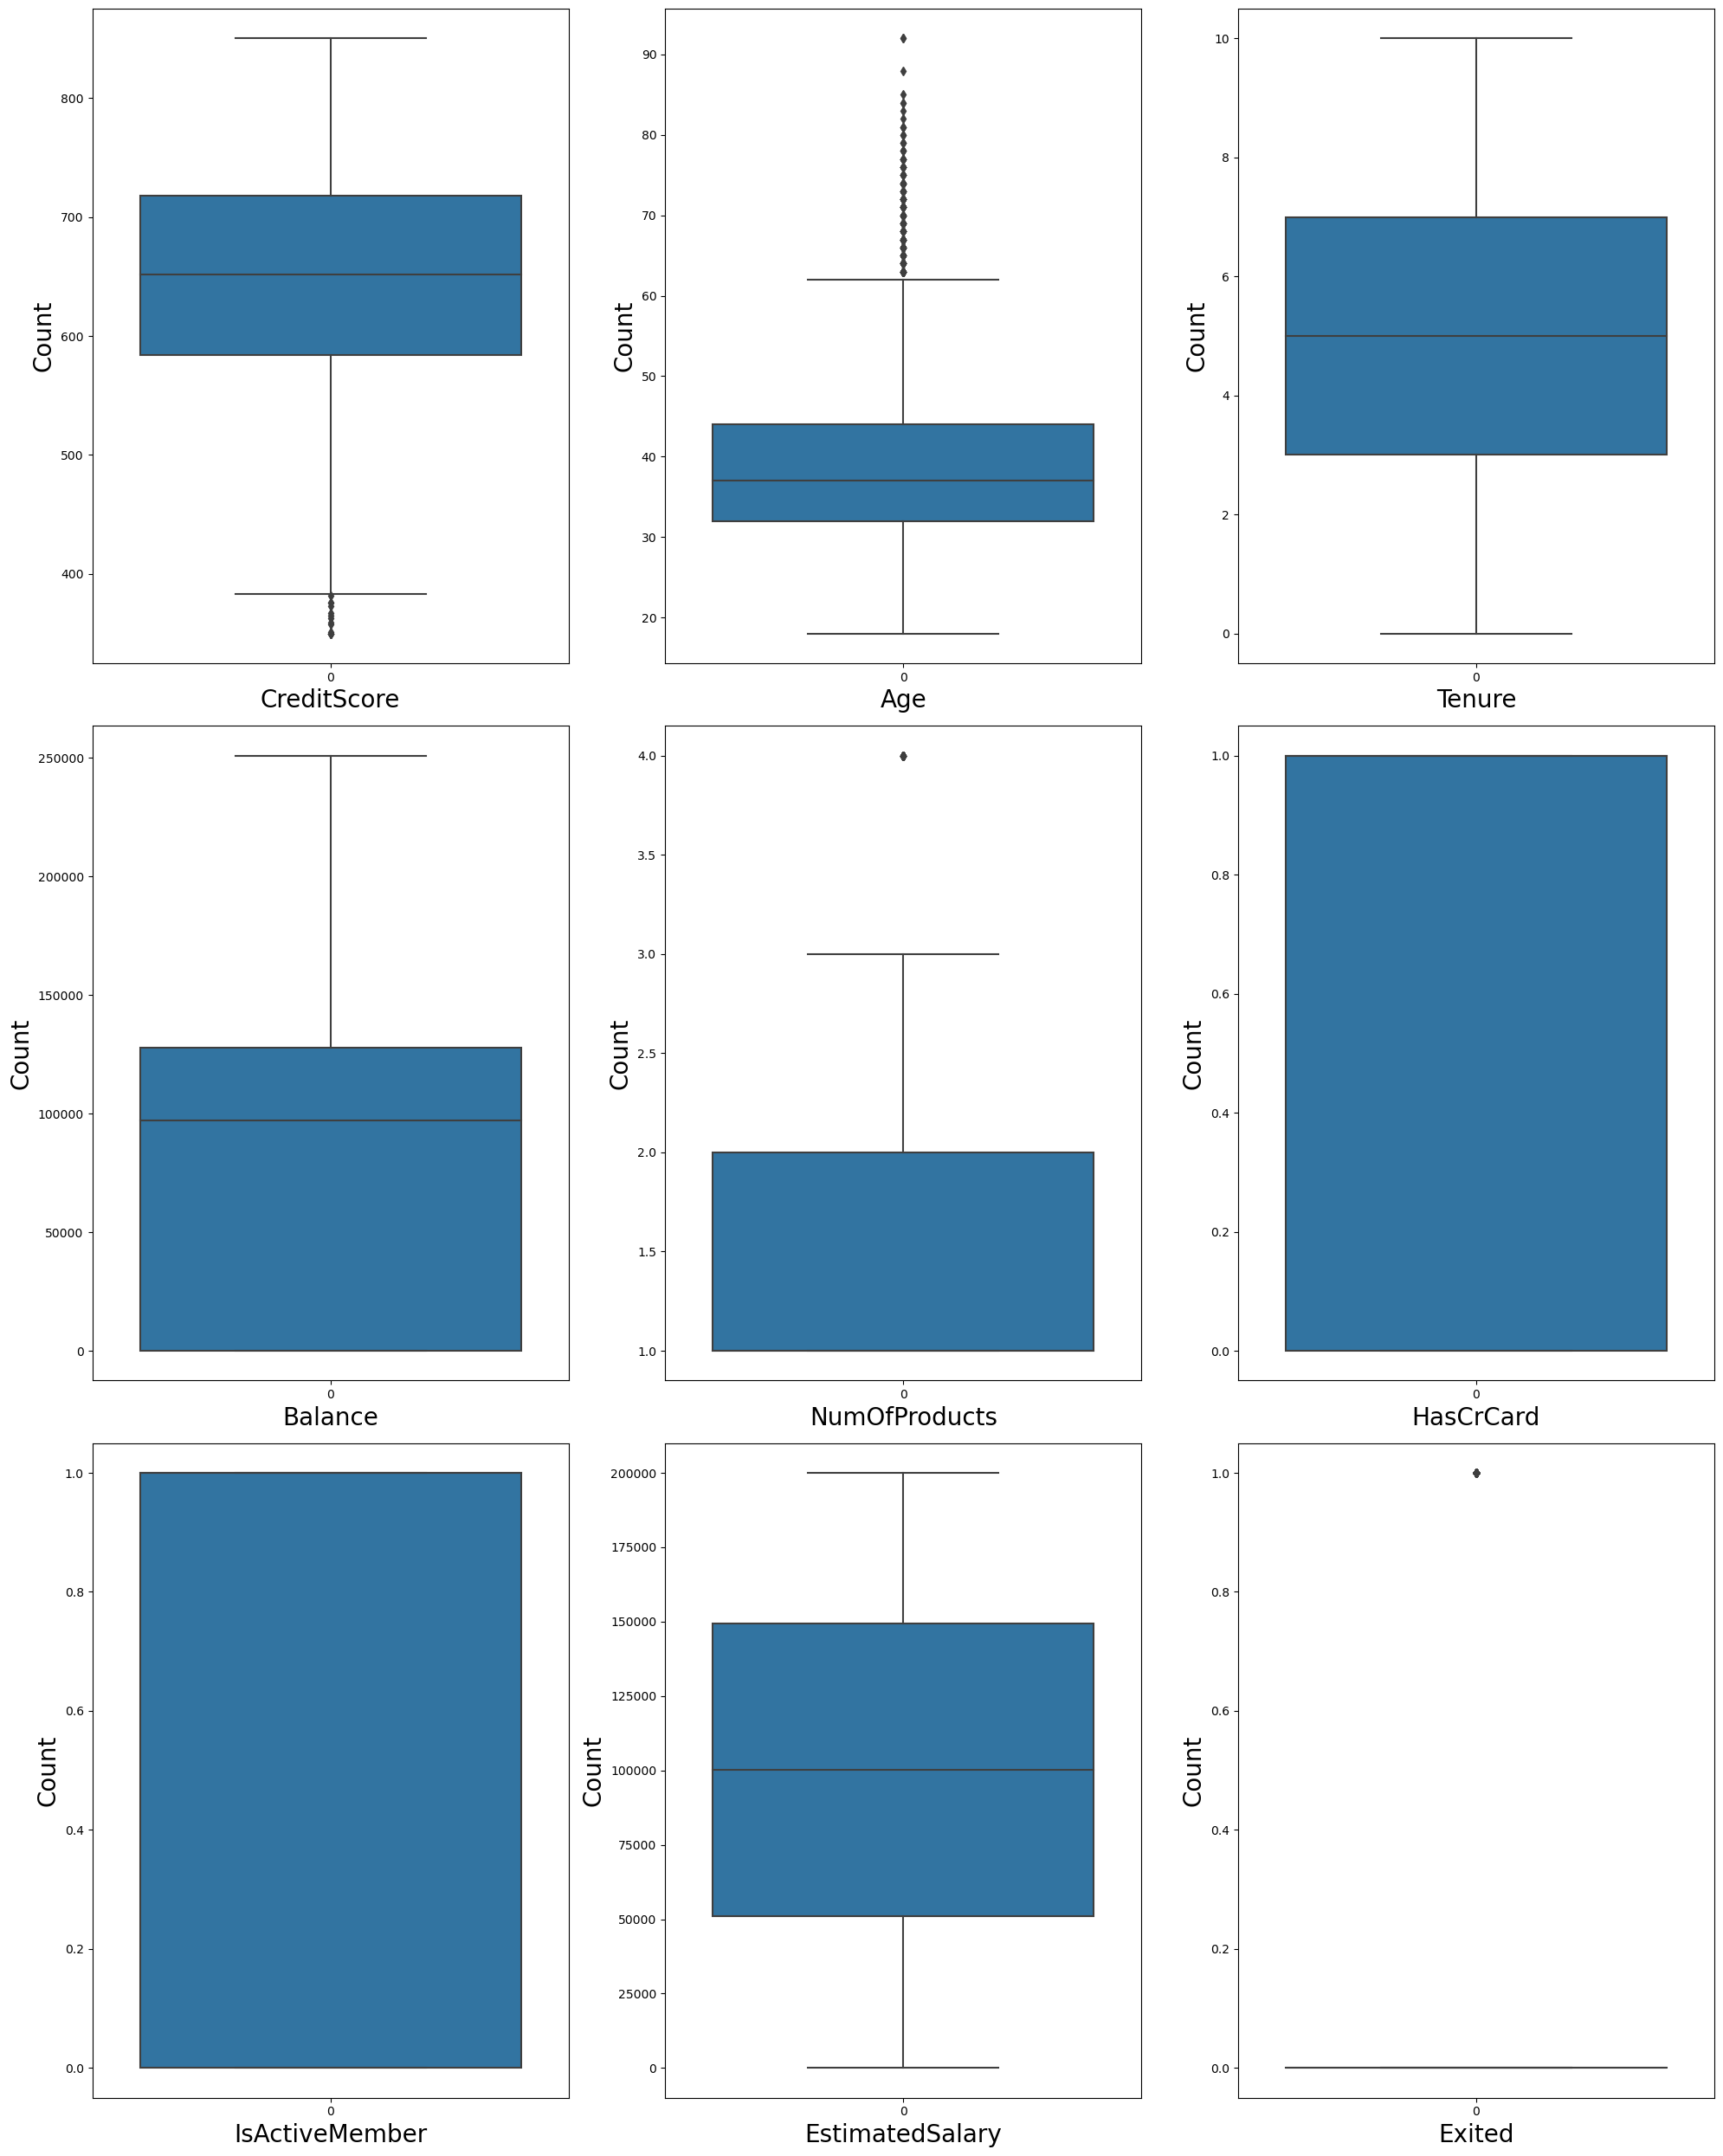

In [17]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<Axes: >

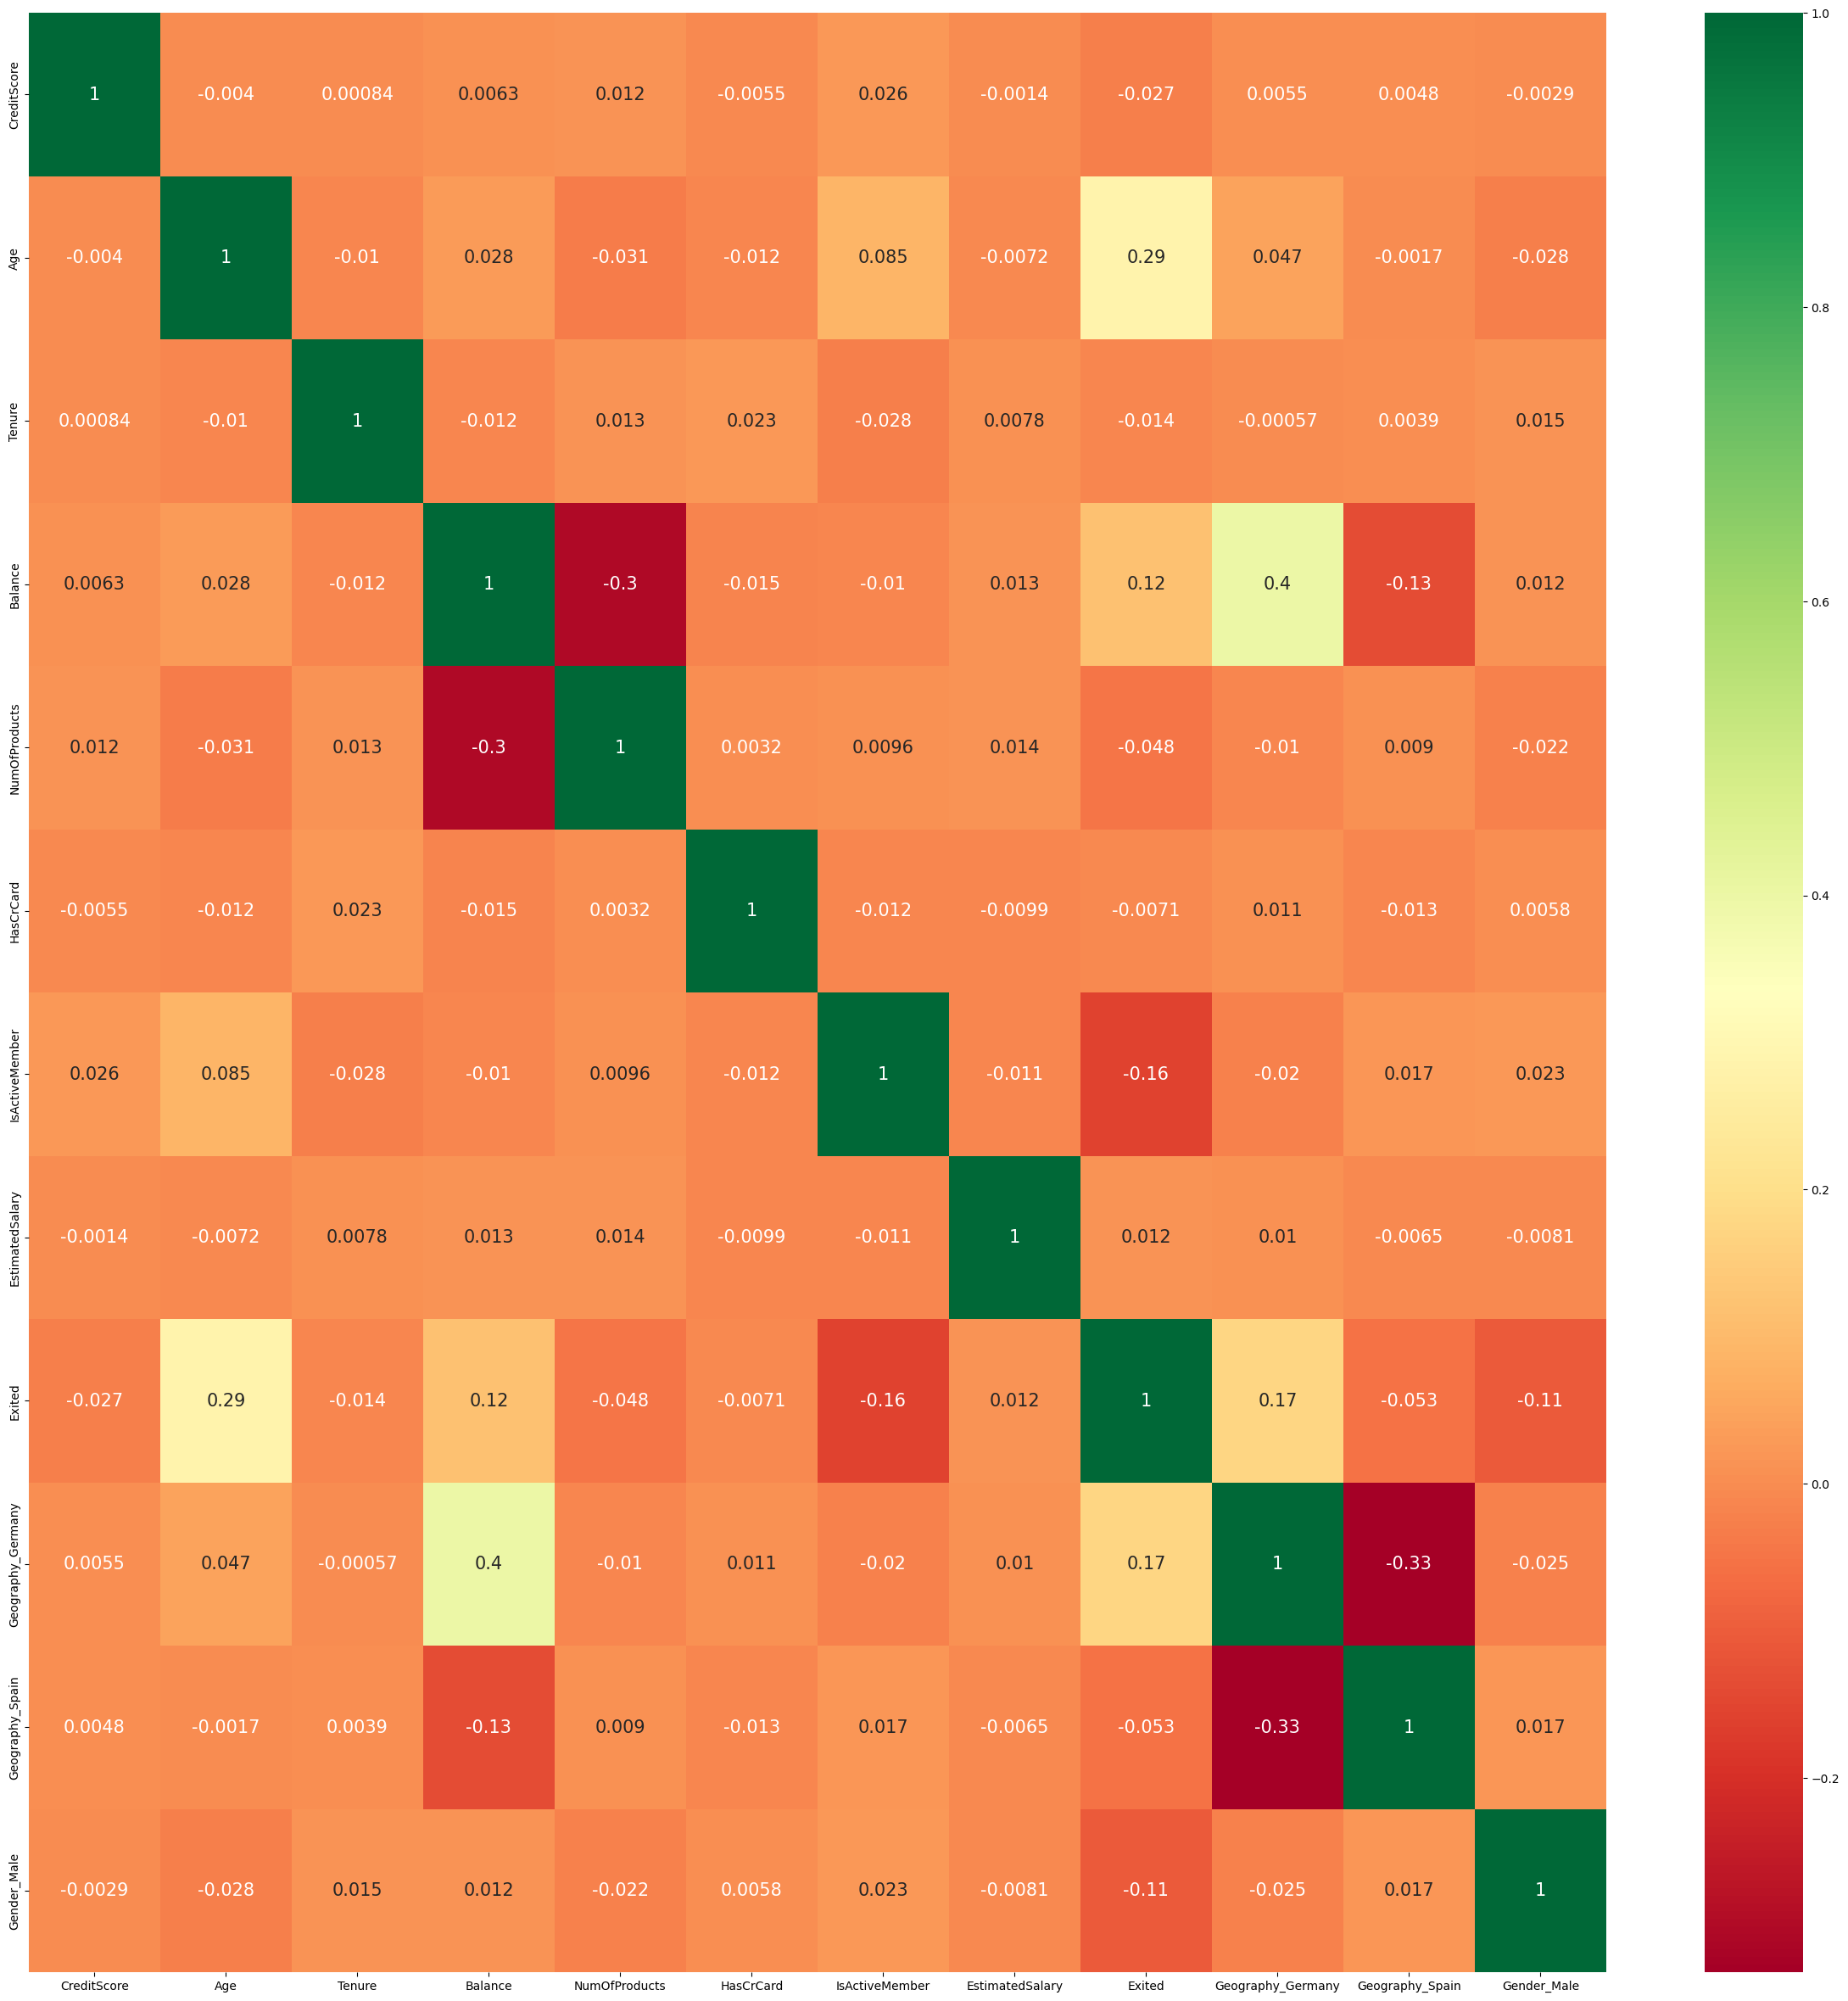

In [18]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

## Model Creation

In [19]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

In [22]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df= scaler.fit_transform(df)

### logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [24]:
y_pred=clf.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
y_pred_prob=clf.predict_proba(X_test)

In [27]:
y_pred_prob

array([[0.78696165, 0.21303835],
       [0.71170263, 0.28829737],
       [0.68204614, 0.31795386],
       ...,
       [0.750077  , 0.249923  ],
       [0.82078775, 0.17921225],
       [0.69151148, 0.30848852]])

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [29]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1952   36]
 [ 482   30]]


In [30]:
recall=recall_score(y_test,y_pred)
recall

0.05859375

In [31]:
precision=precision_score(y_test,y_pred)
precision

0.45454545454545453

In [32]:
f1score=f1_score(y_test,y_pred)
f1score

0.10380622837370242

In [33]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1988
           1       0.45      0.06      0.10       512

    accuracy                           0.79      2500
   macro avg       0.63      0.52      0.49      2500
weighted avg       0.73      0.79      0.72      2500



### Gradient boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

In [35]:
## evaluatin the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
accu_scor=accuracy_score(y_test,y_gbm)
accu_scor

0.862

### Random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [45]:
y_p=rf_clf.predict(X_train)
f1_score(y_train,y_p)

1.0

In [46]:
y_predict=rf_clf.predict(X_test)#testing

In [40]:
pd.crosstab(y_train,y_train_predict)#it will show you confusion matrix

col_0,0,1
Exited,,
0,5975,0
1,0,1525


In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1988
           1       0.79      0.45      0.57       512

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500



## Model Evaluation Report

        MODEL                        ACCURACY
      1)Logistic regression            79%
      2)Gradient Boosting              86.20%
      3)Random forest                  86%

From the above data we can say that Gradient boosting has performed well on the data 

## Challenges faced
The data thus available is neither sufficient nor balanced for both the categories.

On an attempt to balance out the data by down sampling the accuracy of the models was hampered the more so resampling is avoided.